### <span style="color:green">Importing all necessary libraries</span>

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import re
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore")

### <span style="color:green">Loading data</span>

#### There are 8 different .csv files containing the tweet data of 8 different keywords. The data contain columns like Datetime. Tweet Id, Text, URL, User

In [2]:
df_alt = pd.read_csv('altcoin.csv')
df_appl = pd.read_csv('APPL.csv')
df_btc = pd.read_csv('bitcoin.csv')
df_coindesk = pd.read_csv('coindesk.csv')
df_crypto = pd.read_csv('Cryptocurrency.csv')
df_gold = pd.read_csv('Gold.csv')
df_goog = pd.read_csv('GOOG.csv')
df_yhoo = pd.read_csv('YHOO.csv')

#### Assigning a new column to each dataframe, source for identification

In [3]:
df_alt['source'] = 'altcoin'
df_appl['source'] = 'APPL'
df_btc['source'] = 'bitcoin'
df_coindesk['source'] = 'coindesk'
df_crypto['source'] = 'Cryptocurrency'
df_gold['source'] = 'Gold'
df_goog['source'] = 'GOOG'
df_yhoo['source'] = 'YHOO'

#### Concatining all the dataframes into single df

In [4]:
df = pd.concat([df_alt, df_appl, df_btc, df_coindesk, df_crypto, df_gold, df_goog, df_yhoo], ignore_index=True)
df_dummy = df


In [5]:
df.head()

Datetime             Tweet Id  \
0  2023-03-10 23:58:29+00:00  1634342993812414464   
1  2023-03-10 23:58:19+00:00  1634342954755313664   
2  2023-03-10 23:57:48+00:00  1634342825465708545   
3  2023-03-10 23:57:48+00:00  1634342821837811712   
4  2023-03-10 23:57:40+00:00  1634342788518248448   

                                                Text  \
0  #Ethereum price update: \n\n#ETH $1430.93 USD\...   
1  @Altcoin_Gems_ @Lotto_Arb Wow, this is Fstasti...   
2                        @Altcoin_Gold Missing $DSLA   
3          @Altcoin_Gems_ @Lotto_Arb Wow interesting   
4  @TreatsBot $paw #paw #altcoin #memecoins https...   

                                                 URL  \
0  https://twitter.com/0xEthereumYoda/status/1634...   
1  https://twitter.com/missufee1410213/status/163...   
2  https://twitter.com/migueldiz0n/status/1634342...   
3  https://twitter.com/Hanitzy_/status/1634342821...   
4  https://twitter.com/RifainAP/status/1634342788...   

                                  User   source  
0   https://twitter.com/0xEthereumYoda  altcoin  
1  https://twitter.com/missufee1410213  altcoin  
2      https://twitter.com/migueldiz0n  altcoin  
3         https://twitter.com/Hanitzy_  altcoin  
4         https://twitter.com/RifainAP  altcoin

In [6]:
df.shape

(36831, 6)

### <span style="color:green">Data Prepocessing</span>

### Handling Null Values

In [7]:
df.isnull().sum()

Datetime    0
Tweet Id    0
Text        0
URL         0
User        0
source      0
dtype: int64

### Data Types of each column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36831 entries, 0 to 36830
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  36831 non-null  object
 1   Tweet Id  36831 non-null  int64 
 2   Text      36831 non-null  object
 3   URL       36831 non-null  object
 4   User      36831 non-null  object
 5   source    36831 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.7+ MB


### Checking for Duplicated values

In [9]:
df.duplicated().sum()

0

##### Duplicate values are not shown because the source column has different values for different coins. But duplicate tweets may still exsist, where the user has tweeted about multiple coins in a single tweet. 

### checking for duplicate tweets using tweet id counts 

In [10]:
group_and_count_column = 'Tweet Id'

# Get value counts for 'group_and_count_column'
value_counts = df[group_and_count_column].value_counts()

# Filter the results to include only counts greater than or equal to 2
filtered_counts = value_counts[value_counts >= 2]

print(filtered_counts)

Tweet Id
1634342993812414464    3
1634329296910053376    3
1634329356267929601    3
1634329347187195907    3
1634329334927245312    3
                      ..
1634335017387319297    2
1634336606554402821    2
1634336602972463106    2
1634316916394434560    2
1634337173712547841    2
Name: count, Length: 435, dtype: int64


##### This shows that there are 435 tweet's duplicates, some repeated 3 times and some 2 times

### Creating dummies for source

In [11]:
df_source = pd.get_dummies(df['source'])
df = pd.concat([df, df_source], axis=1)
df = df.drop('source', axis = 1)

In [12]:
df.head()

Datetime             Tweet Id  \
0  2023-03-10 23:58:29+00:00  1634342993812414464   
1  2023-03-10 23:58:19+00:00  1634342954755313664   
2  2023-03-10 23:57:48+00:00  1634342825465708545   
3  2023-03-10 23:57:48+00:00  1634342821837811712   
4  2023-03-10 23:57:40+00:00  1634342788518248448   

                                                Text  \
0  #Ethereum price update: \n\n#ETH $1430.93 USD\...   
1  @Altcoin_Gems_ @Lotto_Arb Wow, this is Fstasti...   
2                        @Altcoin_Gold Missing $DSLA   
3          @Altcoin_Gems_ @Lotto_Arb Wow interesting   
4  @TreatsBot $paw #paw #altcoin #memecoins https...   

                                                 URL  \
0  https://twitter.com/0xEthereumYoda/status/1634...   
1  https://twitter.com/missufee1410213/status/163...   
2  https://twitter.com/migueldiz0n/status/1634342...   
3  https://twitter.com/Hanitzy_/status/1634342821...   
4  https://twitter.com/RifainAP/status/1634342788...   

                                  User   APPL  Cryptocurrency   GOOG   Gold  \
0   https://twitter.com/0xEthereumYoda  False           False  False  False   
1  https://twitter.com/missufee1410213  False           False  False  False   
2      https://twitter.com/migueldiz0n  False           False  False  False   
3         https://twitter.com/Hanitzy_  False           False  False  False   
4         https://twitter.com/RifainAP  False           False  False  False   

    YHOO  altcoin  bitcoin  coindesk  
0  False     True    False     False  
1  False     True    False     False  
2  False     True    False     False  
3  False     True    False     False  
4  False     True    False     False

In [13]:
df.shape

(36831, 13)

### Handling duplicate values based on Tweet Id

In [14]:
import pandas as pd

# Replace 'Tweet Id' with the actual column name if it's different
columns_to_sum = ['GOOG', 'Gold', 'YHOO', 'altcoin', 'bitcoin', 'coindesk', 'Cryptocurrency','APPL']

# Group by 'Tweet Id' and sum the specified columns
grouped_df = df.groupby('Tweet Id', as_index=False)[columns_to_sum].sum()

# Merge the aggregated data with the non-aggregated columns
df = pd.merge(df.drop(columns=columns_to_sum), grouped_df, on='Tweet Id')

df


Datetime             Tweet Id  \
0      2023-03-10 23:58:29+00:00  1634342993812414464   
1      2023-03-10 23:58:29+00:00  1634342993812414464   
2      2023-03-10 23:58:29+00:00  1634342993812414464   
3      2023-03-10 23:58:19+00:00  1634342954755313664   
4      2023-03-10 23:57:48+00:00  1634342825465708545   
...                          ...                  ...   
36826  2023-03-05 00:14:38+00:00  1632172734581972992   
36827  2023-03-05 00:13:20+00:00  1632172404909789184   
36828  2023-03-05 00:07:45+00:00  1632170999515869184   
36829  2023-03-05 00:03:14+00:00  1632169864218435585   
36830  2023-03-05 00:00:48+00:00  1632169253079072768   

                                                    Text  \
0      #Ethereum price update: \n\n#ETH $1430.93 USD\...   
1      #Ethereum price update: \n\n#ETH $1430.93 USD\...   
2      #Ethereum price update: \n\n#ETH $1430.93 USD\...   
3      @Altcoin_Gems_ @Lotto_Arb Wow, this is Fstasti...   
4                            @Altcoin_Gold Missing $DSLA   
...                                                  ...   
36826  Khosi did what 😂😂😂😤😤😤😤 yhoo ha.a Nana is dange...   
36827  Yhoo Nana what is your business with Thabang y...   
36828                                           Yes yhoo   
36829         Yhoo I was about to go to bed 😭😭 #BBTitans   
36830  @NguboAyimbathwa @ChristoThurston @ThuliMadons...   

                                                     URL  \
0      https://twitter.com/0xEthereumYoda/status/1634...   
1      https://twitter.com/0xEthereumYoda/status/1634...   
2      https://twitter.com/0xEthereumYoda/status/1634...   
3      https://twitter.com/missufee1410213/status/163...   
4      https://twitter.com/migueldiz0n/status/1634342...   
...                                                  ...   
36826  https://twitter.com/MzuzwanaYamkela/status/163...   
36827  https://twitter.com/MzuzwanaYamkela/status/163...   
36828  https://twitter.com/Lissssativa/status/1632170...   
36829  https://twitter.com/its_sommy/status/163216986...   
36830  https://twitter.com/Bright_Afrika/status/16321...   

                                      User  GOOG  Gold  YHOO  altcoin  \
0       https://twitter.com/0xEthereumYoda     0     0     0        1   
1       https://twitter.com/0xEthereumYoda     0     0     0        1   
2       https://twitter.com/0xEthereumYoda     0     0     0        1   
3      https://twitter.com/missufee1410213     0     0     0        1   
4          https://twitter.com/migueldiz0n     0     1     0        1   
...                                    ...   ...   ...   ...      ...   
36826  https://twitter.com/MzuzwanaYamkela     0     0     1        0   
36827  https://twitter.com/MzuzwanaYamkela     0     0     1        0   
36828      https://twitter.com/Lissssativa     0     0     1        0   
36829        https://twitter.com/its_sommy     0     0     1        0   
36830    https://twitter.com/Bright_Afrika     0     0     1        0   

       bitcoin  coindesk  Cryptocurrency  APPL  
0            1         0               1     0  
1            1         0               1     0  
2            1         0               1     0  
3            0         0               0     0  
4            0         0               0     0  
...        ...       ...             ...   ...  
36826        0         0               0     0  
36827        0         0               0     0  
36828        0         0               0     0  
36829        0         0               0     0  
36830        0         0               0     0  

[36831 rows x 13 columns]

In [15]:
df.shape

(36831, 13)

In [16]:
df.columns

Index(['Datetime', 'Tweet Id', 'Text', 'URL', 'User', 'GOOG', 'Gold', 'YHOO',
       'altcoin', 'bitcoin', 'coindesk', 'Cryptocurrency', 'APPL'],
      dtype='object')

In [17]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [18]:
df.shape

(36371, 13)

In [19]:
import re

df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', str(x)))


In [20]:
import re

# Assuming df is your DataFrame
df['User'] = df['User'].apply(lambda x: re.sub(r'https://twitter.com/', '', str(x)))
df['Text'] = df['Text'].apply(lambda x: re.sub(r'\n', ' ', str(x)))
df

Datetime             Tweet Id  \
0      2023-03-10 23:58:29+00:00  1634342993812414464   
3      2023-03-10 23:58:19+00:00  1634342954755313664   
4      2023-03-10 23:57:48+00:00  1634342825465708545   
6      2023-03-10 23:57:48+00:00  1634342821837811712   
7      2023-03-10 23:57:40+00:00  1634342788518248448   
...                          ...                  ...   
36826  2023-03-05 00:14:38+00:00  1632172734581972992   
36827  2023-03-05 00:13:20+00:00  1632172404909789184   
36828  2023-03-05 00:07:45+00:00  1632170999515869184   
36829  2023-03-05 00:03:14+00:00  1632169864218435585   
36830  2023-03-05 00:00:48+00:00  1632169253079072768   

                                                    Text  \
0      Ethereum price update   ETH  USD Bitcoin  BTC ...   
3             AltcoinGems LottoArb Wow this is Fstastic    
4                               AltcoinGold Missing DSLA   
6                   AltcoinGems LottoArb Wow interesting   
7      TreatsBot paw paw altcoin memecoins httpstcohi...   
...                                                  ...   
36826  Khosi did what  yhoo haa Nana is dangerous BBT...   
36827  Yhoo Nana what is your business with Thabang y...   
36828                                           Yes yhoo   
36829            Yhoo I was about to go to bed  BBTitans   
36830  NguboAyimbathwa ChristoThurston ThuliMadonsela...   

                                                     URL             User  \
0      https://twitter.com/0xEthereumYoda/status/1634...   0xEthereumYoda   
3      https://twitter.com/missufee1410213/status/163...  missufee1410213   
4      https://twitter.com/migueldiz0n/status/1634342...      migueldiz0n   
6      https://twitter.com/Hanitzy_/status/1634342821...         Hanitzy_   
7      https://twitter.com/RifainAP/status/1634342788...         RifainAP   
...                                                  ...              ...   
36826  https://twitter.com/MzuzwanaYamkela/status/163...  MzuzwanaYamkela   
36827  https://twitter.com/MzuzwanaYamkela/status/163...  MzuzwanaYamkela   
36828  https://twitter.com/Lissssativa/status/1632170...      Lissssativa   
36829  https://twitter.com/its_sommy/status/163216986...        its_sommy   
36830  https://twitter.com/Bright_Afrika/status/16321...    Bright_Afrika   

       GOOG  Gold  YHOO  altcoin  bitcoin  coindesk  Cryptocurrency  APPL  
0         0     0     0        1        1         0               1     0  
3         0     0     0        1        0         0               0     0  
4         0     1     0        1        0         0               0     0  
6         0     0     0        1        0         0               0     0  
7         0     0     0        1        0         0               0     0  
...     ...   ...   ...      ...      ...       ...             ...   ...  
36826     0     0     1        0        0         0               0     0  
36827     0     0     1        0        0         0               0     0  
36828     0     0     1        0        0         0               0     0  
36829     0     0     1        0        0         0               0     0  
36830     0     0     1        0        0         0               0     0  

[36371 rows x 13 columns]

In [21]:
df['Datetime'].value_counts()

Datetime
2023-03-10 23:12:45+00:00    15
2023-03-10 17:34:24+00:00    11
2023-03-10 23:00:02+00:00    10
2023-03-10 20:00:02+00:00     9
2023-03-10 23:00:00+00:00     9
                             ..
2023-03-10 17:24:06+00:00     1
2023-03-10 17:25:50+00:00     1
2023-03-10 17:26:17+00:00     1
2023-03-10 17:27:32+00:00     1
2023-03-05 00:00:48+00:00     1
Name: count, Length: 29029, dtype: int64

In [22]:
df.head(10)

Datetime             Tweet Id  \
0   2023-03-10 23:58:29+00:00  1634342993812414464   
3   2023-03-10 23:58:19+00:00  1634342954755313664   
4   2023-03-10 23:57:48+00:00  1634342825465708545   
6   2023-03-10 23:57:48+00:00  1634342821837811712   
7   2023-03-10 23:57:40+00:00  1634342788518248448   
8   2023-03-10 23:57:27+00:00  1634342737553117185   
9   2023-03-10 23:57:21+00:00  1634342709417902080   
10  2023-03-10 23:57:13+00:00  1634342676723290114   
11  2023-03-10 23:56:48+00:00  1634342572700344320   
12  2023-03-10 23:56:44+00:00  1634342556094832642   

                                                 Text  \
0   Ethereum price update   ETH  USD Bitcoin  BTC ...   
3          AltcoinGems LottoArb Wow this is Fstastic    
4                            AltcoinGold Missing DSLA   
6                AltcoinGems LottoArb Wow interesting   
7   TreatsBot paw paw altcoin memecoins httpstcohi...   
8   TreatsBot paw paw altcoin airdroo httpstcoqXbAbzi   
9   AltcoinGems LottoArb this project gonna be suc...   
10                 AltcoinGems LottoArb great project   
11  TreatsBot paw paw altcoin memecoins httpstcoKz...   
12   Price pattern in RUNE  Symmetrical triangle o...   

                                                  URL             User  GOOG  \
0   https://twitter.com/0xEthereumYoda/status/1634...   0xEthereumYoda     0   
3   https://twitter.com/missufee1410213/status/163...  missufee1410213     0   
4   https://twitter.com/migueldiz0n/status/1634342...      migueldiz0n     0   
6   https://twitter.com/Hanitzy_/status/1634342821...         Hanitzy_     0   
7   https://twitter.com/RifainAP/status/1634342788...         RifainAP     0   
8   https://twitter.com/Ibraheem_K09/status/163434...     Ibraheem_K09     0   
9   https://twitter.com/blessedlovely_2/status/163...  blessedlovely_2     0   
10  https://twitter.com/udahlahyaa27/status/163434...     udahlahyaa27     0   
11  https://twitter.com/RifainAP/status/1634342572...         RifainAP     0   
12  https://twitter.com/sennet_ai/status/163434255...        sennet_ai     0   

    Gold  YHOO  altcoin  bitcoin  coindesk  Cryptocurrency  APPL  
0      0     0        1        1         0               1     0  
3      0     0        1        0         0               0     0  
4      1     0        1        0         0               0     0  
6      0     0        1        0         0               0     0  
7      0     0        1        0         0               0     0  
8      0     0        1        0         0               0     0  
9      0     0        1        0         0               0     0  
10     0     0        1        0         0               0     0  
11     0     0        1        0         0               0     0  
12     0     0        1        0         0               0     0

In [23]:
import pandas as pd

# Assuming your DataFrame is named df
df['Datetime'] = pd.to_datetime(df['Datetime'])  # Convert 'Datetime' column to datetime format

# Extract time details
df['Hour'] = df['Datetime'].dt.hour
df['Minute'] = df['Datetime'].dt.minute
df['Second'] = df['Datetime'].dt.second

# Extract date details
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['DayOfWeek'] = df['Datetime'].dt.dayofweek  # Monday is 0 and Sunday is 6

df = df.drop('Datetime', axis = 1)


In [24]:
df = df.drop('Tweet Id', axis = 1)
df =df.drop('URL', axis = 1)
df =df.drop('Year', axis = 1)

In [25]:
'''from pandas_profiling import ProfileReport

profile = ProfileReport(df)

profile.to_file("output.html")'''

'from pandas_profiling import ProfileReport\n\nprofile = ProfileReport(df)\n\nprofile.to_file("output.html")'

In [26]:
'''df.to_csv('output.csv', index=False)'''

"df.to_csv('output.csv', index=False)"

In [27]:
'''import re

# Assuming 'Text' is the name of the column in your DataFrame
df['k'] = df['Text'].apply(lambda x: re.findall(r'\n', x))

# Now, k is a Series containing lists of newline characters for each element in the 'Text' column
'''

"import re\n\n# Assuming 'Text' is the name of the column in your DataFrame\ndf['k'] = df['Text'].apply(lambda x: re.findall(r'\n', x))\n\n# Now, k is a Series containing lists of newline characters for each element in the 'Text' column\n"

In [28]:
'''df['k'] = df['Text'].apply(lambda x: len(re.findall(r'\n', x)))

# Now, k is a Series containing the count of newline characters for each element in the 'Text' column'''


"df['k'] = df['Text'].apply(lambda x: len(re.findall(r'\n', x)))\n\n# Now, k is a Series containing the count of newline characters for each element in the 'Text' column"

In [29]:
'''df['k'].value_counts()'''

"df['k'].value_counts()"

## I.Removing tokenizing, removing stop words, stemming 

In [32]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import re
stop_words = stopwords.words('english')

In [33]:
# removing stopwords from 'Text' column

#stop_words = set(stopwords.words('english'))
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

In [35]:
corpus = df['Text'].tolist()

In [36]:
corpus

['Ethereum price update ETH USD Bitcoin BTC Follow recent ETH price updates altcoin cryptocurrency crypto',
 'AltcoinGems LottoArb Wow Fstastic',
 'AltcoinGold Missing DSLA',
 'AltcoinGems LottoArb Wow interesting',
 'TreatsBot paw paw altcoin memecoins httpstcohikIDhleo',
 'TreatsBot paw paw altcoin airdroo httpstcoqXbAbzi',
 'AltcoinGems LottoArb project gon na successful',
 'AltcoinGems LottoArb great project',
 'TreatsBot paw paw altcoin memecoins httpstcoKzNSDRwB',
 'Price pattern RUNE Symmetrical triangle RUNEUSDT chart info httpstcoywZtYlJOeb THORChain crypto altcoin httpstcoVcMuhTpg',
 'circle might nonstatement statement Ive ever seen app',
 'AltcoinGems LottoArb looks interesting',
 'AltcoinGems LottoArb really cool',
 'TreatsBot paw paw altcoin memecoins httpstcoCyNpPguAP',
 'AltcoinGems LottoArb Nice',
 'AltcoinGems LottoArb Amazing project goodluck',
 'skalndallar bitmiyor usdc ile usdt short pozisyonlar ayorlar piyasanann dengelenecei varsa da bu hrszlklarn bitmesini sala

In [ ]:
corpus=[]
l = len(df)
print(l)
for i in range(l):
    review = re.sub('[^a-zA-Z]', ' ', df['Text'][i])
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords)]
    review = ' '.join(review)
    corpus.append(review)

In [37]:
#do some analysis
from nltk import FreqDist
frequency_distribution = FreqDist(corpus)
print(frequency_distribution)
frequency_distribution.most_common(20)

<FreqDist with 33596 samples and 36371 outcomes>


[('', 614),
 ('Yhoo', 93),
 ('applmorning', 79),
 ('BTCUSD SHORTED Binance UTC BTC cryptocurrency', 66),
 ('bitcoinprice cryptocurrency bitcoin', 57),
 ('One Bitcoin worth Market Cap Billion Based coindesk BPI bitcoin', 55),
 ('BTCUSD LONGED Binance UTC BTC cryptocurrency', 53),
 ('TreatsBot paw paw altcoin', 52),
 ('TreatsBot PAW PAW altcoin memecoins', 43),
 ('goldsilver', 41),
 ('Applhe', 38),
 ('CN Shill best altcoin memecoin RichQUACK QUACK', 26),
 ('DM altcoin x today tell RichQUACK QUACK', 26),
 ('CK low cap altcoin aware RichQUACK QUACK', 26),
 ('CJ altcoin X week RichQUACK QUACK', 26),
 ('E altcoin x today RichQUACK QUACK BTC', 26),
 ('Ethereum price update ETH USD Bitcoin BTC Follow recent ETH price updates altcoin cryptocurrency crypto',
  25),
 ('googjjkkmm', 25),
 ('Bitcoin', 24),
 ('TreatsBot PAW PAW altcoin', 23)]

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Replace 'text_column' with the actual name of the column containing the textual reviews

# Extract the first review
first_review = df['Text'].iloc[0]

# Bag of Words (BoW) Vectorizer
bow_vectorizer = CountVectorizer()
bow_vectors = bow_vectorizer.fit_transform(df['Text'])
bow_feature_names = bow_vectorizer.get_feature_names_out()

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(df['Text'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Word Clouds
def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

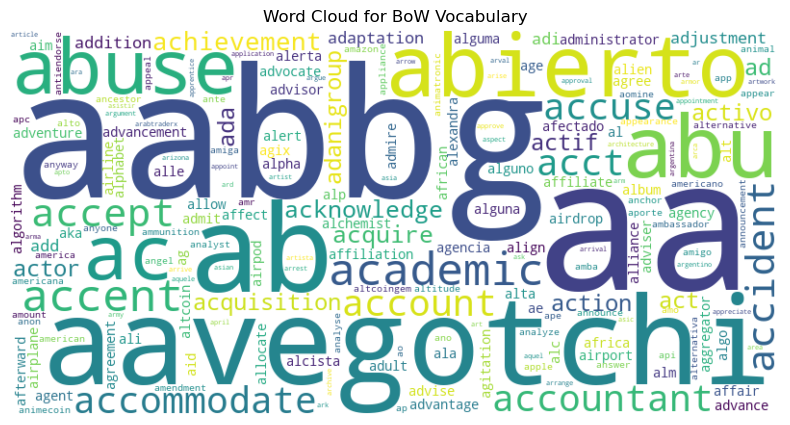

In [39]:
# Word Cloud for BoW vocabulary
plot_word_cloud(' '.join(bow_feature_names), 'Word Cloud for BoW Vocabulary')

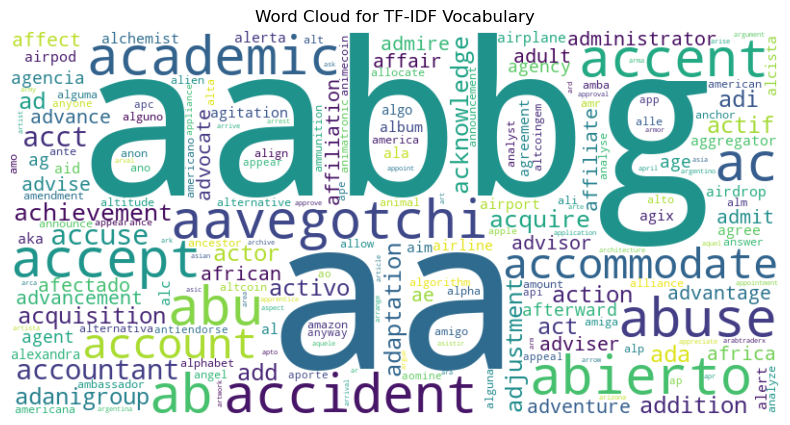

In [40]:
# Word Cloud for TF-IDF vocabulary
plot_word_cloud(' '.join(tfidf_feature_names), 'Word Cloud for TF-IDF Vocabulary')

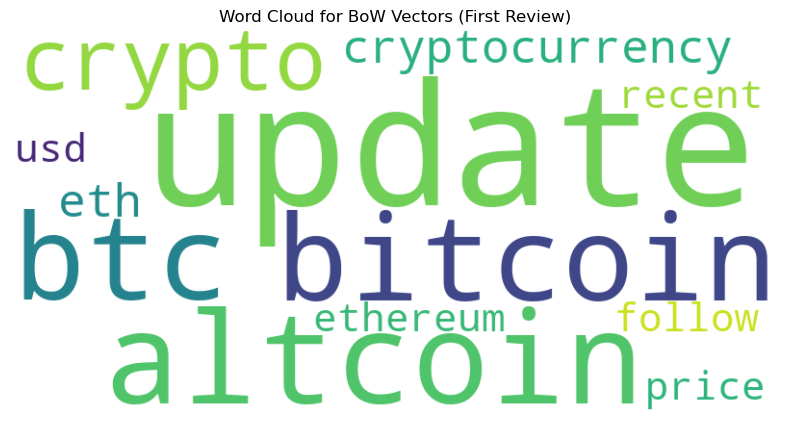

In [41]:
# Word Cloud for BoW vectors of the first review
plot_word_cloud(' '.join([word for word in bow_feature_names if bow_vectors[0, bow_vectorizer.vocabulary_[word]] > 0]), 'Word Cloud for BoW Vectors (First Review)')

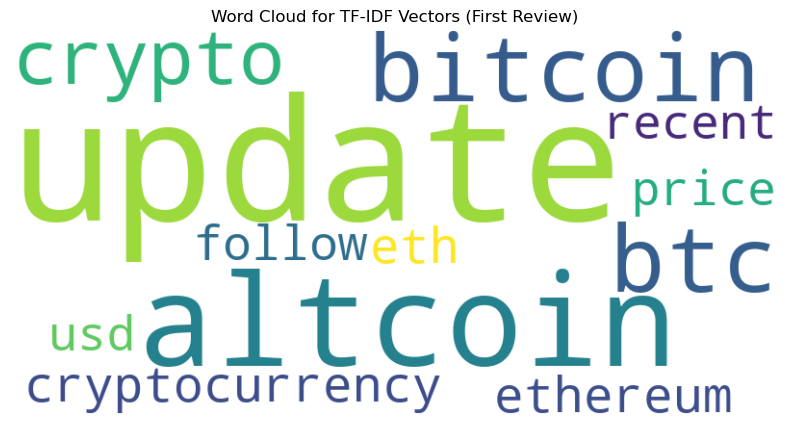

In [42]:
# Word Cloud for TF-IDF vectors of the first review
plot_word_cloud(' '.join([word for word in tfidf_feature_names if tfidf_vectors[0, tfidf_vectorizer.vocabulary_[word]] > 0]), 'Word Cloud for TF-IDF Vectors (First Review)')

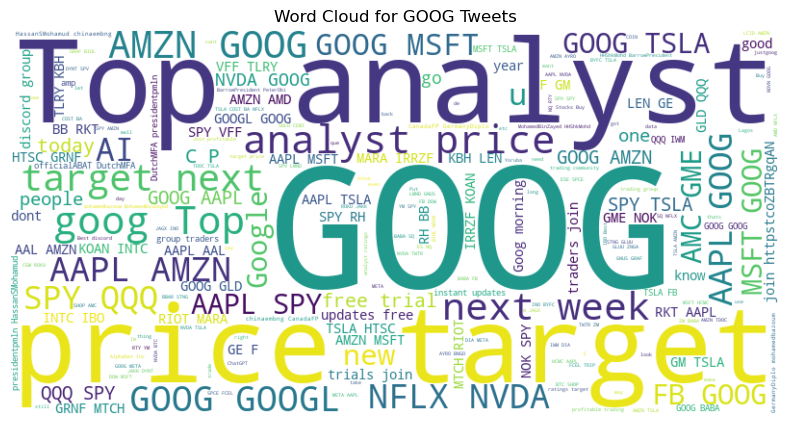

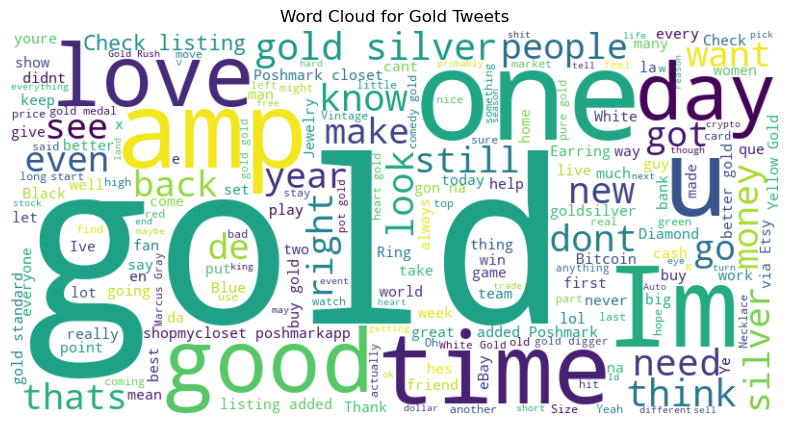

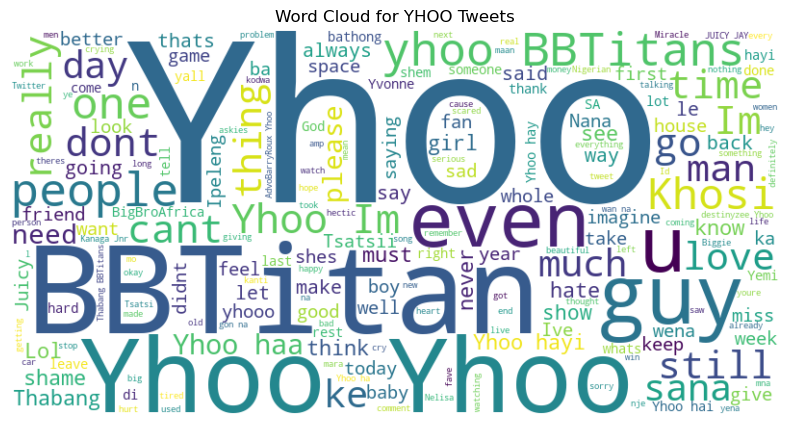

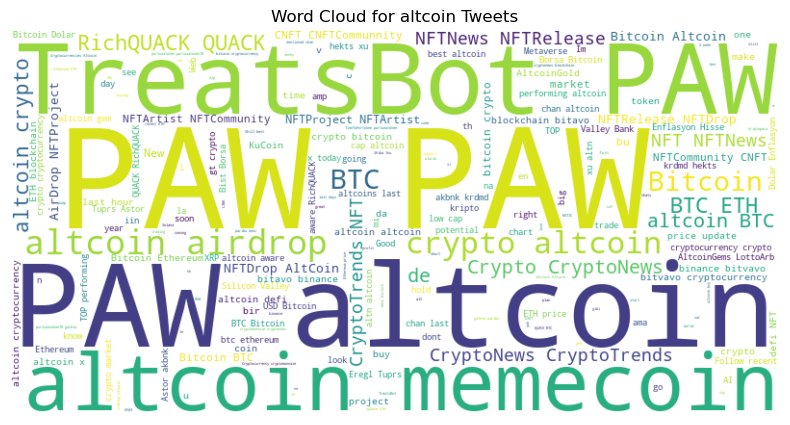

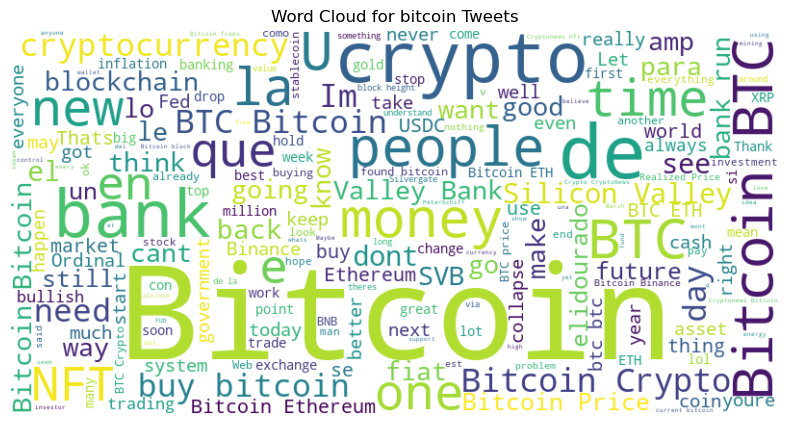

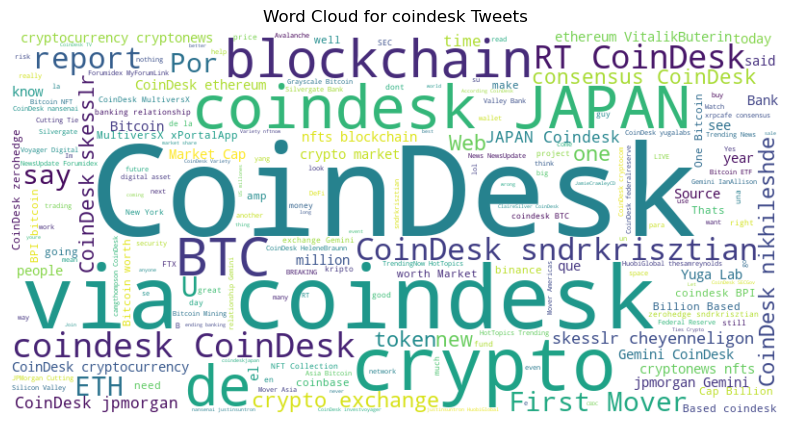

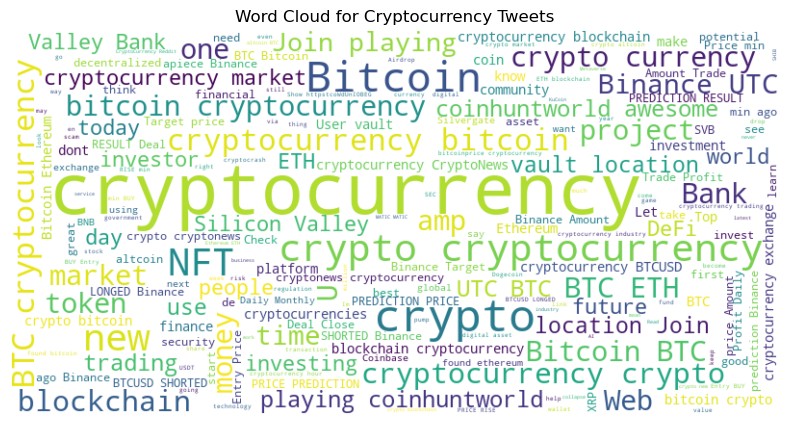

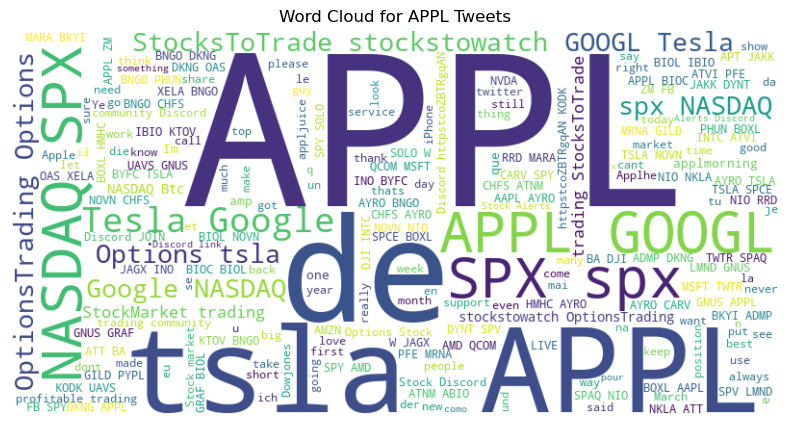

In [43]:
coins = ['GOOG', 'Gold', 'YHOO', 'altcoin', 'bitcoin', 'coindesk', 'Cryptocurrency', 'APPL']
for coin in coins:
    coin_tweets = ' '.join(df[df[coin] > 0]['Text'])
    wordcloud_coin = WordCloud(width=800, height=400, background_color='white').generate(coin_tweets)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_coin, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {coin} Tweets')
    plt.show()

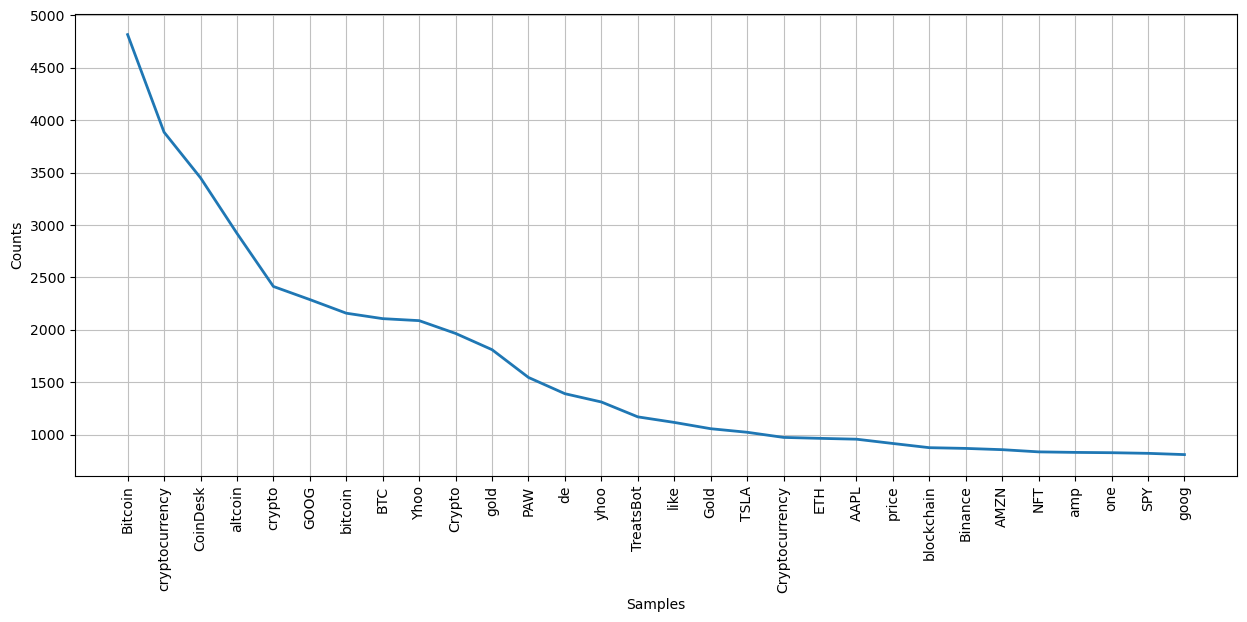

<Axes: xlabel='Samples', ylabel='Counts'>

In [44]:
# Frequency Distribution of Words
all_words = ' '.join(corpus)
frequency_distribution = FreqDist(word_tokenize(all_words))
plt.figure(figsize=(15, 6))
frequency_distribution.plot(30, cumulative=False)


# Visualization

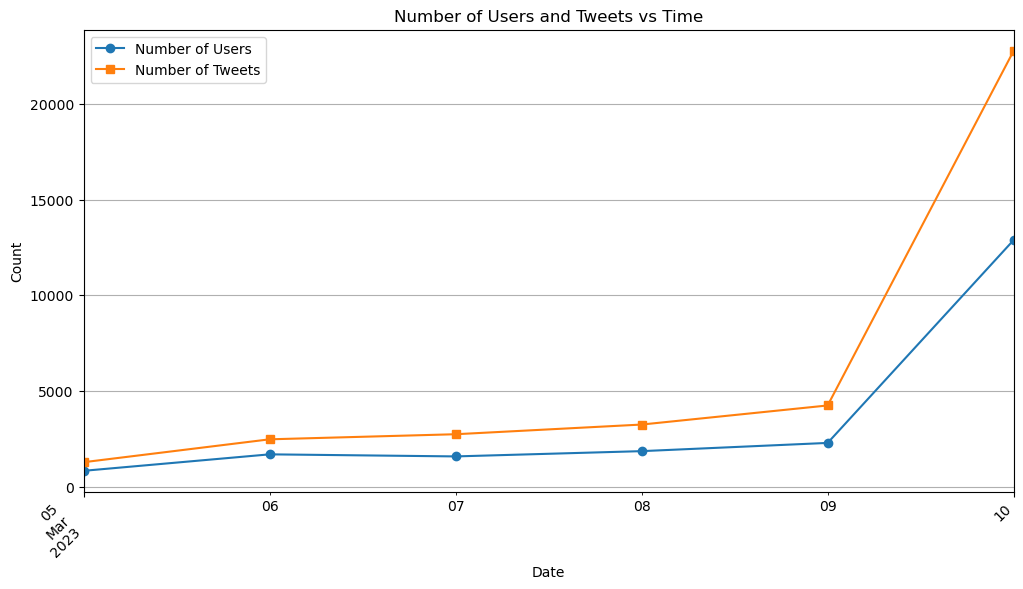

In [45]:

df_dummy['Datetime'] = pd.to_datetime(df_dummy['Datetime'])

# Group by 'review_date' and count the number of unique customers and products
users_over_time = df_dummy.groupby(df_dummy['Datetime'].dt.to_period("D"))['User'].nunique()
tweets_over_time = df_dummy.groupby(df_dummy['Datetime'].dt.to_period("D"))['Tweet Id'].count()

# Plot the total number of customers and products over time
plt.figure(figsize=(12, 6))
users_over_time.plot(marker='o', linestyle='-', label='Number of Users')
tweets_over_time.plot(marker='s', linestyle='-', label='Number of Tweets')
plt.title('Number of Users and Tweets vs Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.show()

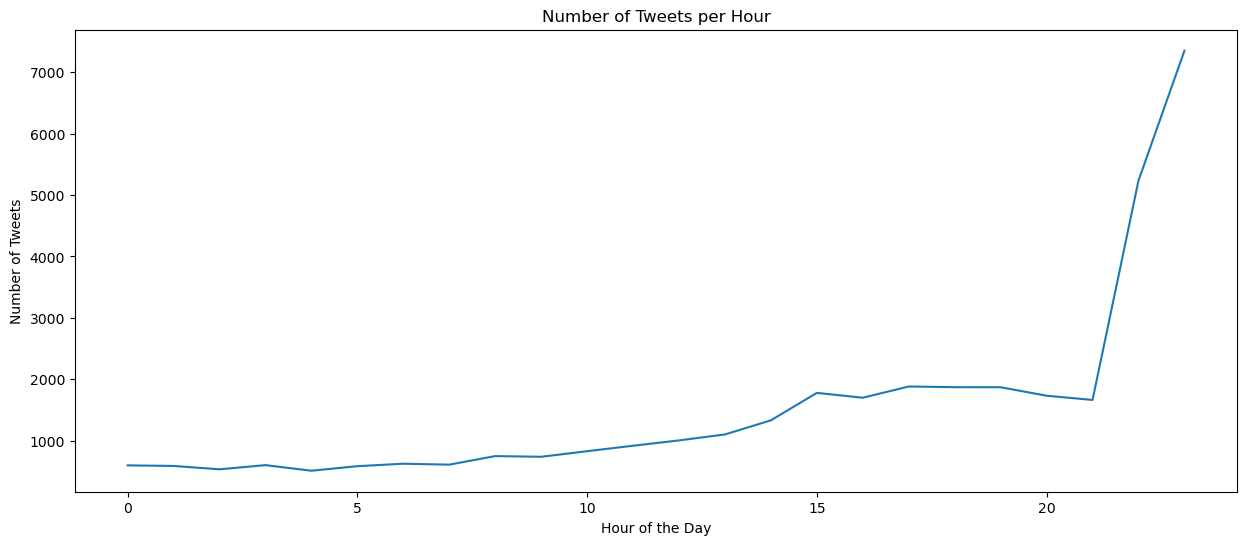

In [46]:
# Number of Tweets per Hour
tweets_per_hour = df.groupby('Hour')['Text'].count()
plt.figure(figsize=(15, 6))
sns.lineplot(x=tweets_per_hour.index, y=tweets_per_hour.values)
plt.title('Number of Tweets per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.show()

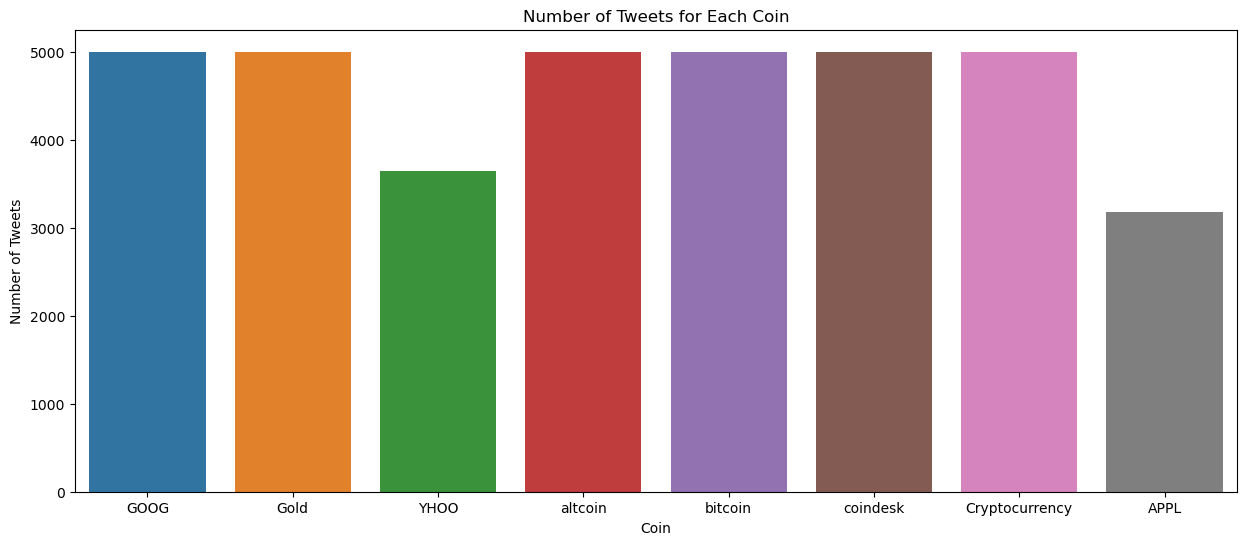

In [47]:
# Number of Tweets for Each Coin
#coins = ['APPL', 'Cryptocurrency', 'GOOG', 'Gold', 'YHOO', 'altcoin', 'bitcoin', 'coindesk']
tweets_per_coin = df[coins].sum()
plt.figure(figsize=(15, 6))
sns.barplot(x=tweets_per_coin.index, y=tweets_per_coin.values)
plt.title('Number of Tweets for Each Coin')
plt.xlabel('Coin')
plt.ylabel('Number of Tweets')
plt.show()

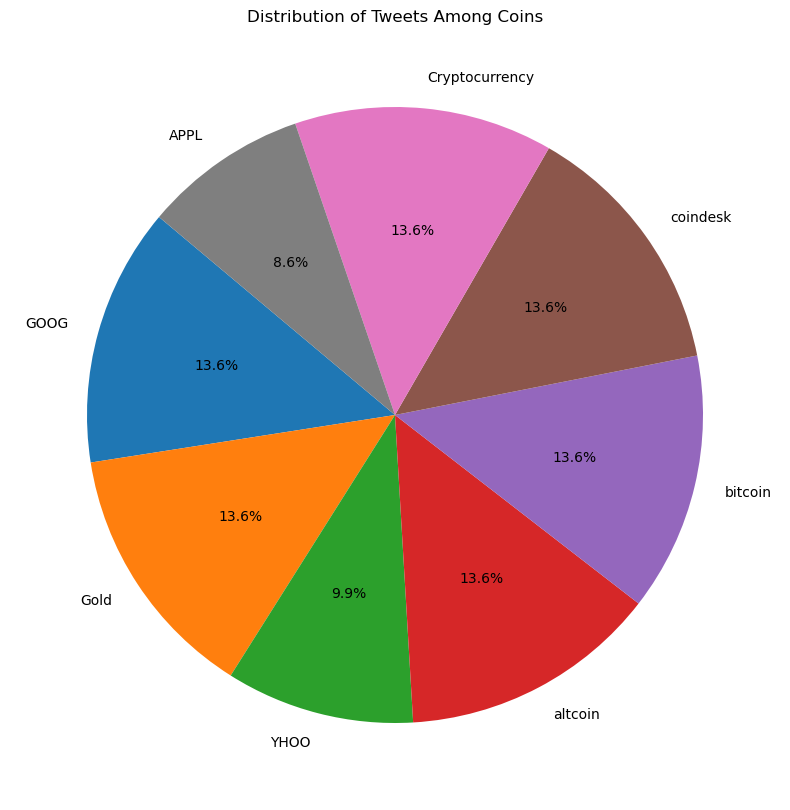

In [48]:
# Pie Chart for Distribution of Tweets among Coins
plt.figure(figsize=(10, 10))
plt.pie(tweets_per_coin, labels=tweets_per_coin.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Tweets Among Coins')
plt.show()


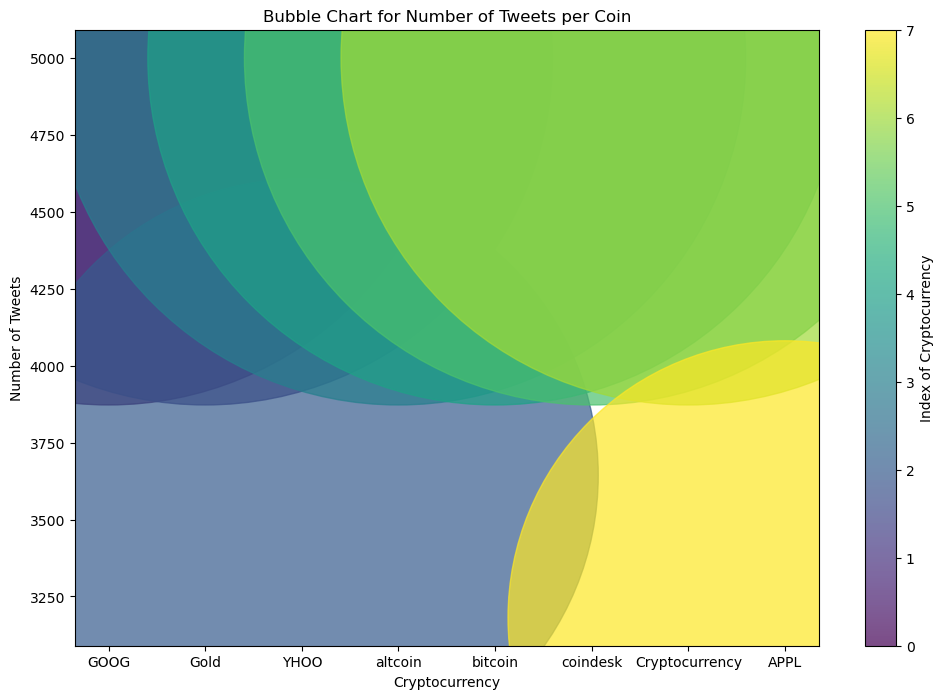

In [49]:
# Bubble Chart for Number of Tweets per Coin
plt.figure(figsize=(12, 8))
plt.scatter(coins, tweets_per_coin, s=tweets_per_coin*50, c=np.arange(len(coins)), cmap='viridis', alpha=0.7)
plt.title('Bubble Chart for Number of Tweets per Coin')
plt.xlabel('Cryptocurrency')
plt.ylabel('Number of Tweets')
plt.colorbar(label='Index of Cryptocurrency')
plt.show()

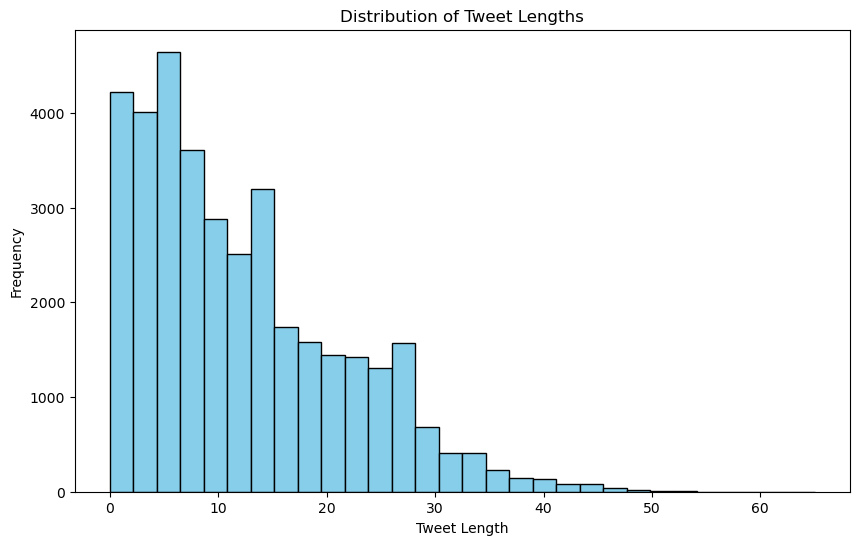

In [82]:
# Create a histogram for tweet lengths
plt.figure(figsize=(10, 6))
plt.hist(df['Tweet_Length'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')
plt.show()


### Sentiment Analysis

In [50]:
# Sentiment Analysis
df['Sentiment'] = df['Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df.columns

Index(['Text', 'User', 'GOOG', 'Gold', 'YHOO', 'altcoin', 'bitcoin',
       'coindesk', 'Cryptocurrency', 'APPL', 'Hour', 'Minute', 'Second',
       'Month', 'Day', 'DayOfWeek', 'Sentiment'],
      dtype='object')

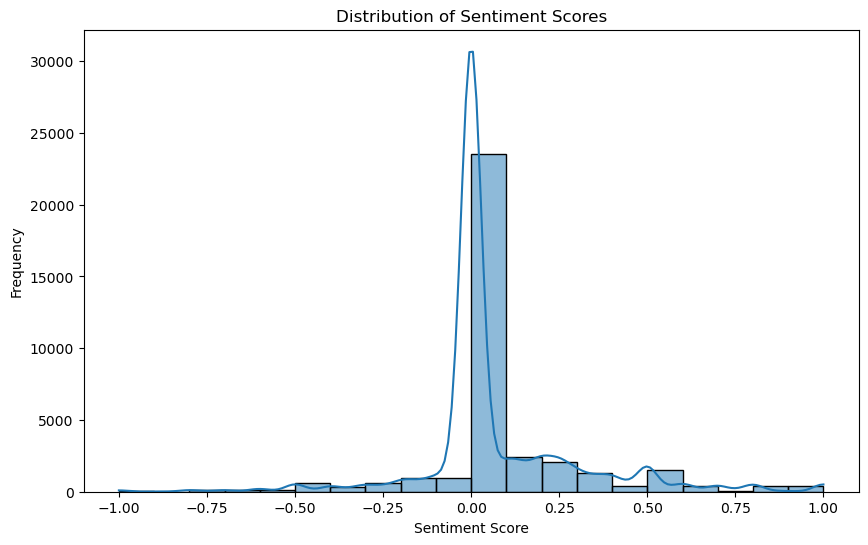

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is the dataframe containing the data

# Calculate the sentiment scores
df['Sentiment'] = df['Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Create a histogram of the sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Sentiment', bins=20, kde=True)

plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

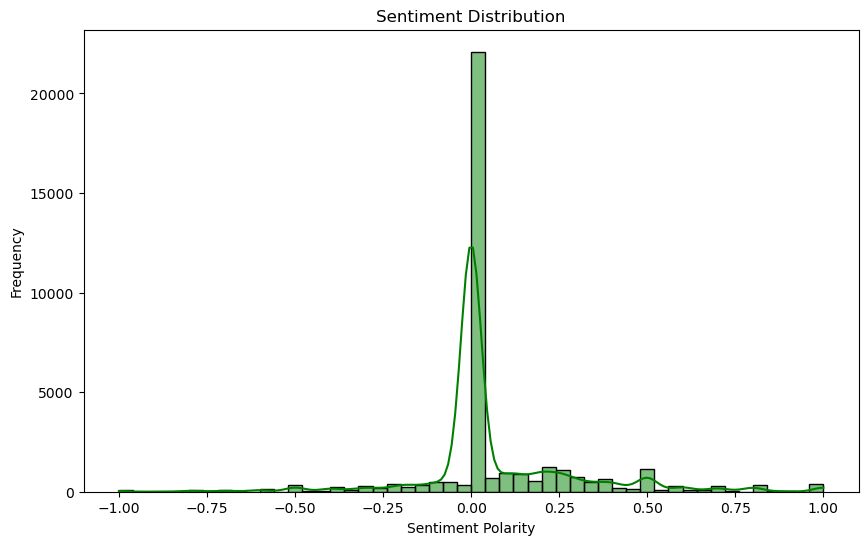

In [53]:
# Histogram for Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment'], bins=50, kde=True, color='green', edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

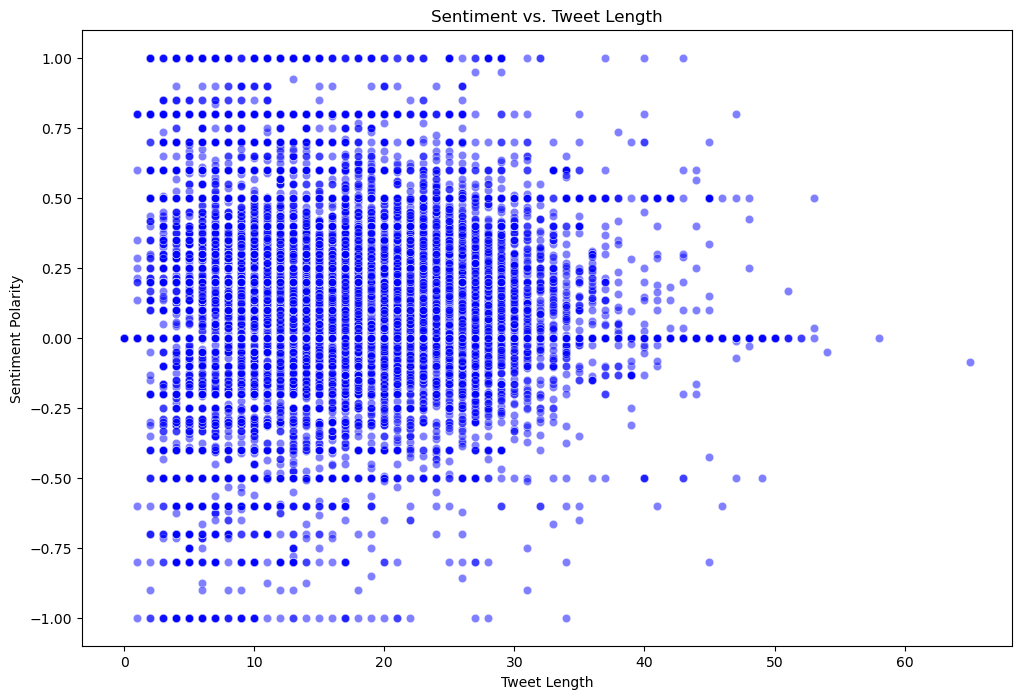

In [54]:
df['Tweet_Length'] = df['Text'].apply(lambda x: len(word_tokenize(str(x))))
# Scatter Plot for Sentiment vs. Tweet Length
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Tweet_Length', y='Sentiment', data=df, color='blue', alpha=0.5)
plt.title('Sentiment vs. Tweet Length')
plt.xlabel('Tweet Length')
plt.ylabel('Sentiment Polarity')
plt.show()


Coin
other             35689
GOOG                185
altcoin             137
Gold                128
bitcoin             121
Cryptocurrency       55
coindesk             34
APPL                 18
YHOO                  4
Name: count, dtype: int64


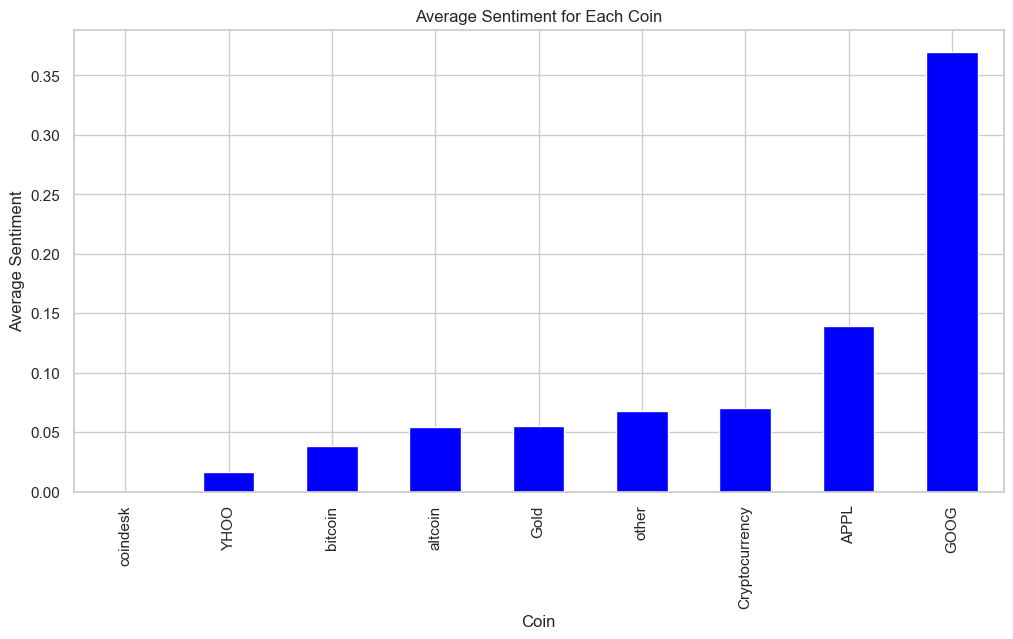

In [87]:
# Assuming df is the dataframe containing the data

# Define the list of coins
coins = ['GOOG', 'Gold', 'YHOO', 'altcoin', 'bitcoin', 'coindesk', 'Cryptocurrency', 'APPL']

# Calculate the average sentiment for each coin
df['Coin'] = df['Text'].apply(lambda x: x.split(' ')[1] if len(x.split(' ')) > 1 and x.split(' ')[1] in coins else 'other')

# Check the created 'Coin' column
print(df['Coin'].value_counts())

# Now you can proceed with calculating average sentiments
average_sentiments = df.groupby('Coin')['Sentiment'].mean()

# Create a barplot of the average sentiment for each coin
plt.figure(figsize=(12, 6))
average_sentiments.sort_values().plot(kind='bar', color='blue')
plt.xlabel('Coin')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment for Each Coin')
plt.show()


In [55]:
# Positive and Negative Word Clouds
positive_tweets = ' '.join(df[df['Sentiment'] > 0]['Text'])
negative_tweets = ' '.join(df[df['Sentiment'] < 0]['Text'])

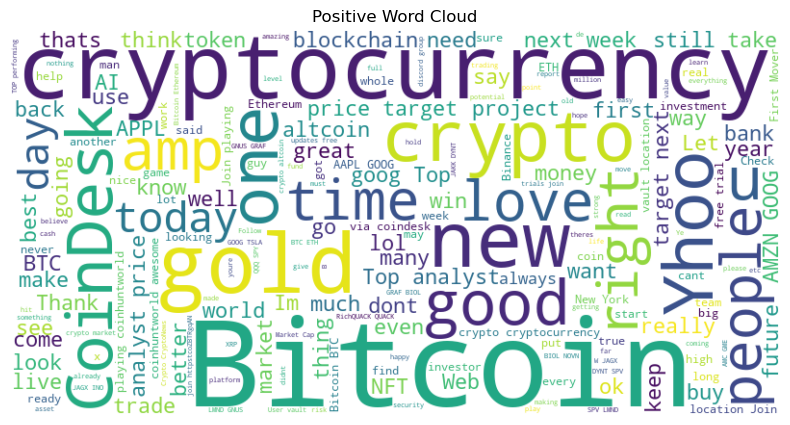

In [56]:
# Positive Word Cloud
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Word Cloud')
plt.show()

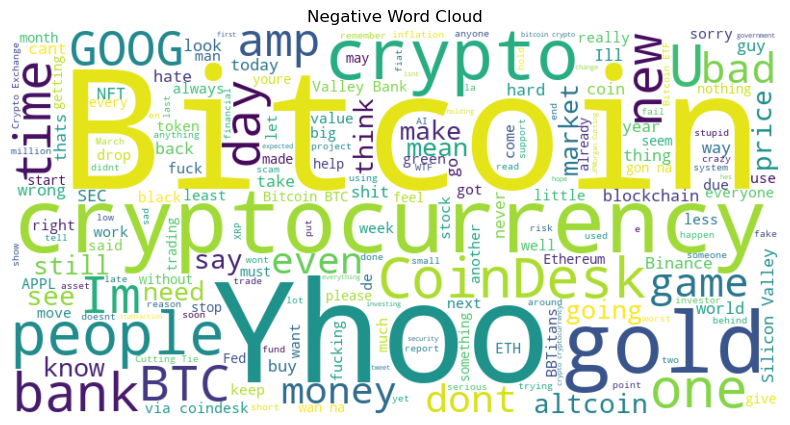

In [57]:
# Negative Word Cloud
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Word Cloud')
plt.show()

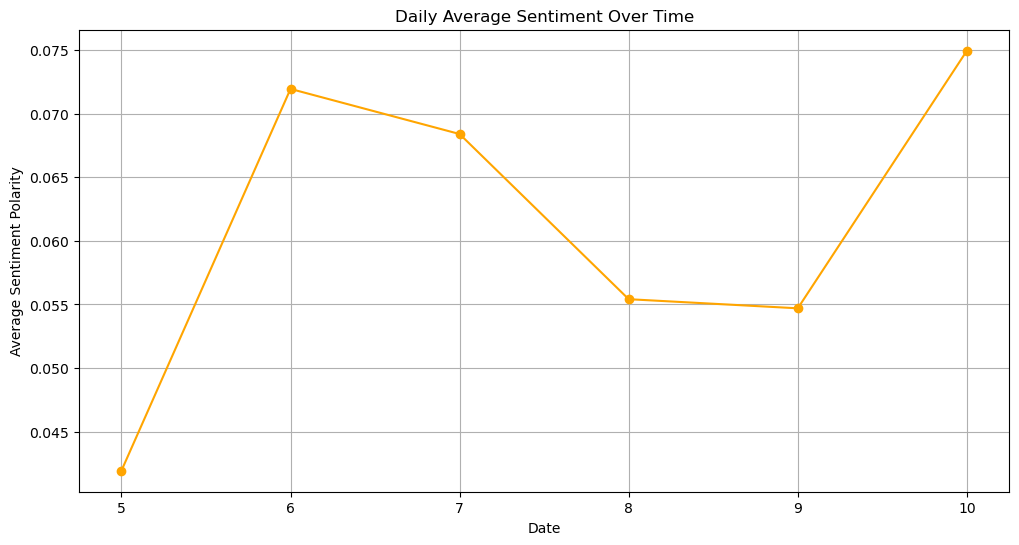

In [58]:
# Time Series Plot for Sentiment Over Time
daily_sentiment = df.groupby(df['Day'])['Sentiment'].mean()
plt.figure(figsize=(12, 6))
daily_sentiment.plot(kind='line', marker='o', color='orange')
plt.title('Daily Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Polarity')
plt.grid(True)
plt.show()


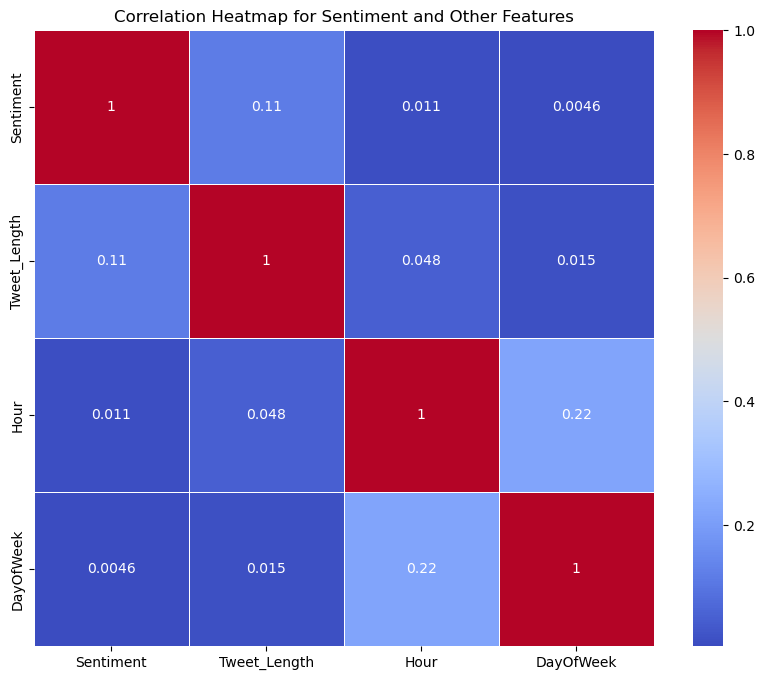

In [59]:
# Correlation between Sentiment and Other Features
corr_sentiment = df[['Sentiment', 'Tweet_Length', 'Hour', 'DayOfWeek']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_sentiment, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Sentiment and Other Features')
plt.show()

In [60]:
df.describe()

GOOG          Gold          YHOO       altcoin       bitcoin  \
count  36371.000000  36371.000000  36371.000000  36371.000000  36371.000000   
mean       0.137500      0.137500      0.100190      0.137500      0.137500   
std        0.344379      0.344379      0.300257      0.344379      0.344379   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           coindesk  Cryptocurrency          APPL          Hour       Minute  \
count  36371.000000    36371.000000  36371.000000  36371.000000  36371.00000   
mean       0.137500        0.137500      0.087460     16.525089     29.33293   
std        0.344379        0.344379      0.282512      6.526859     17.66052   
min        0.000000        0.000000      0.000000      0.000000      0.00000   
25%        0.000000        0.000000      0.000000     13.000000     14.00000   
50%        0.000000        0.000000      0.000000     18.000000     30.00000   
75%        0.000000        0.000000      0.000000     22.000000     45.00000   
max        1.000000        1.000000      1.000000     23.000000     59.00000   

             Second    Month           Day     DayOfWeek     Sentiment  \
count  36371.000000  36371.0  36371.000000  36371.000000  36371.000000   
mean      28.254956      3.0      9.023865      3.273872      0.068945   
std       17.427374      0.0      1.481025      1.367108      0.234747   
min        0.000000      3.0      5.000000      0.000000     -1.000000   
25%       13.000000      3.0      8.000000      3.000000      0.000000   
50%       28.000000      3.0     10.000000      4.000000      0.000000   
75%       43.000000      3.0     10.000000      4.000000      0.100000   
max       59.000000      3.0     10.000000      6.000000      1.000000   

       Tweet_Length  
count  36371.000000  
mean      12.179951  
std        9.277533  
min        0.000000  
25%        5.000000  
50%       10.000000  
75%       18.000000  
max       65.000000

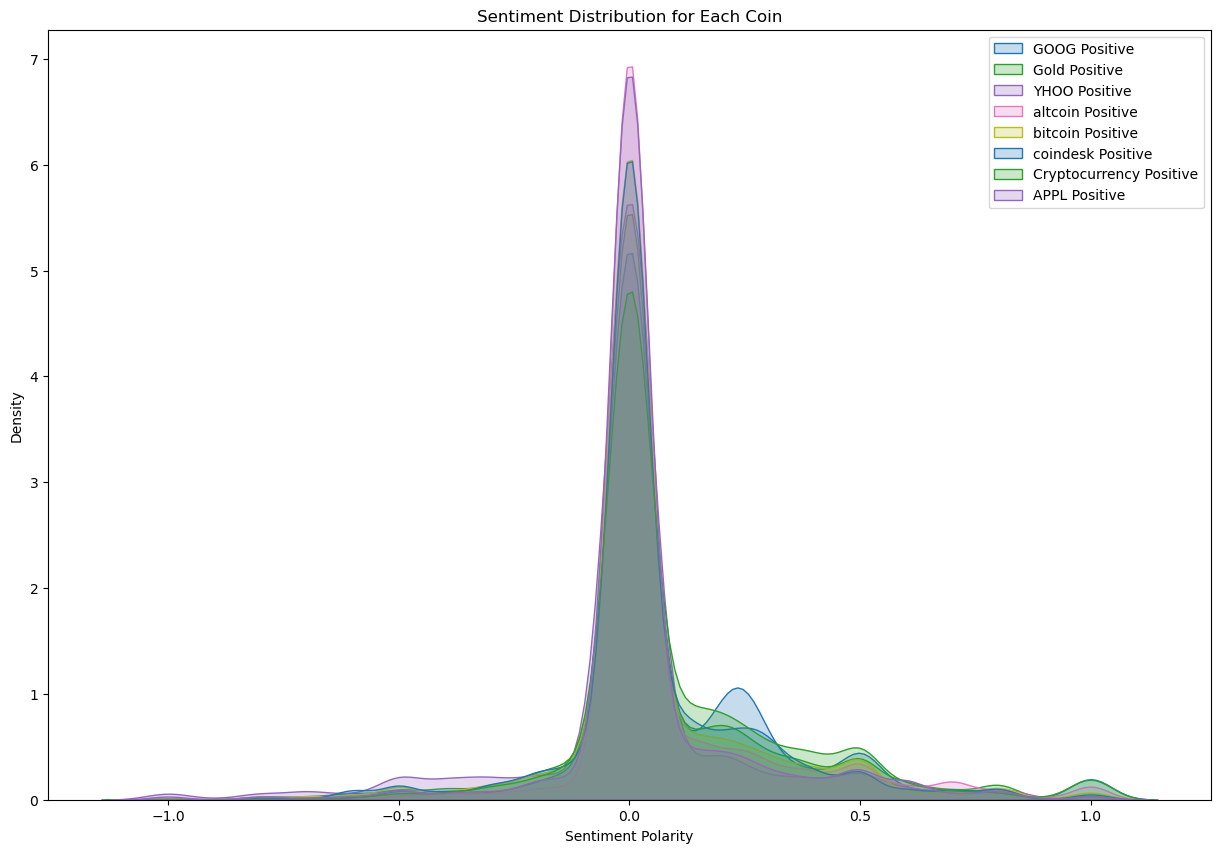

In [61]:
# 2. Sentiment Distribution for Each Coin
plt.figure(figsize=(15, 10))
for coin in coins:
    sns.kdeplot(df[df[coin] > 0]['Sentiment'], label=f'{coin} Positive', fill=True)
    sns.kdeplot(df[df[coin] < 0]['Sentiment'], label=f'{coin} Negative', fill=True)
plt.title('Sentiment Distribution for Each Coin')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Density')
plt.legend()
plt.show()

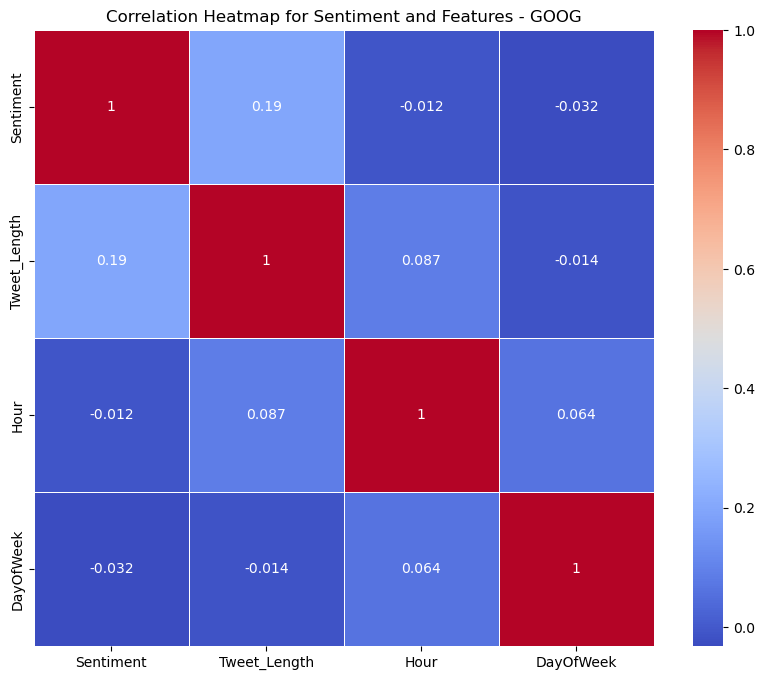

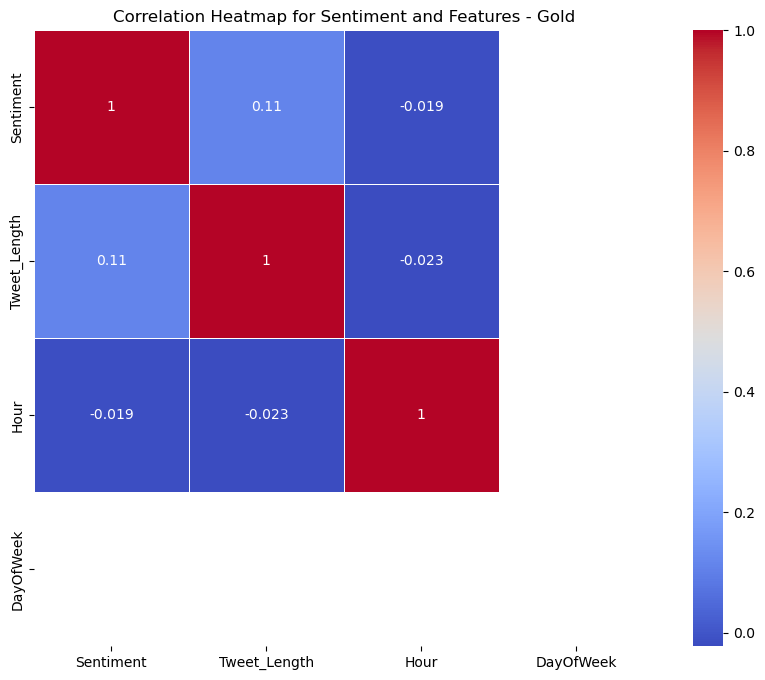

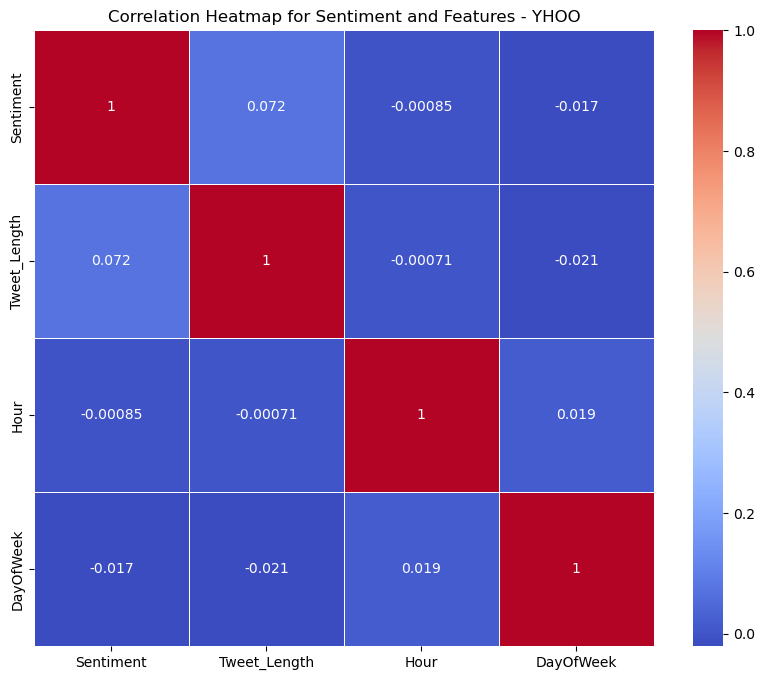

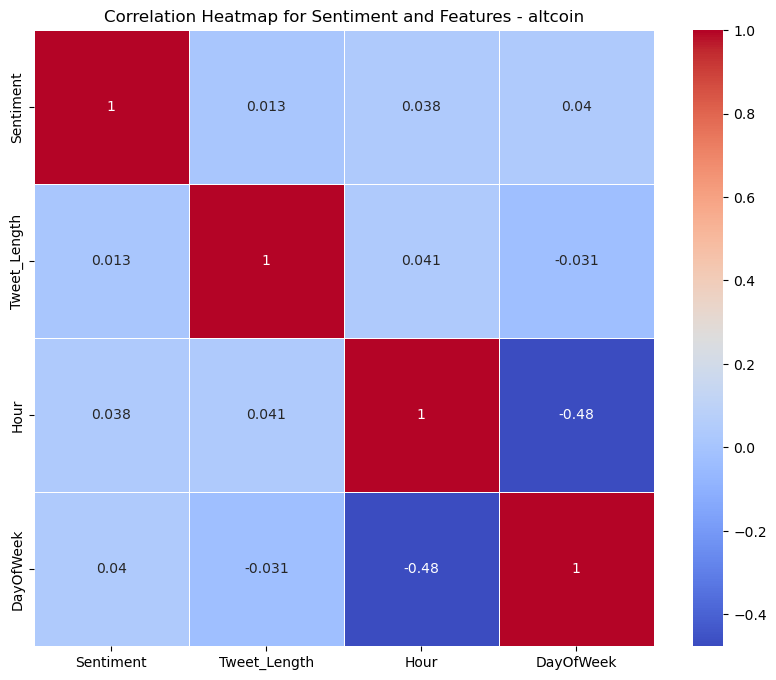

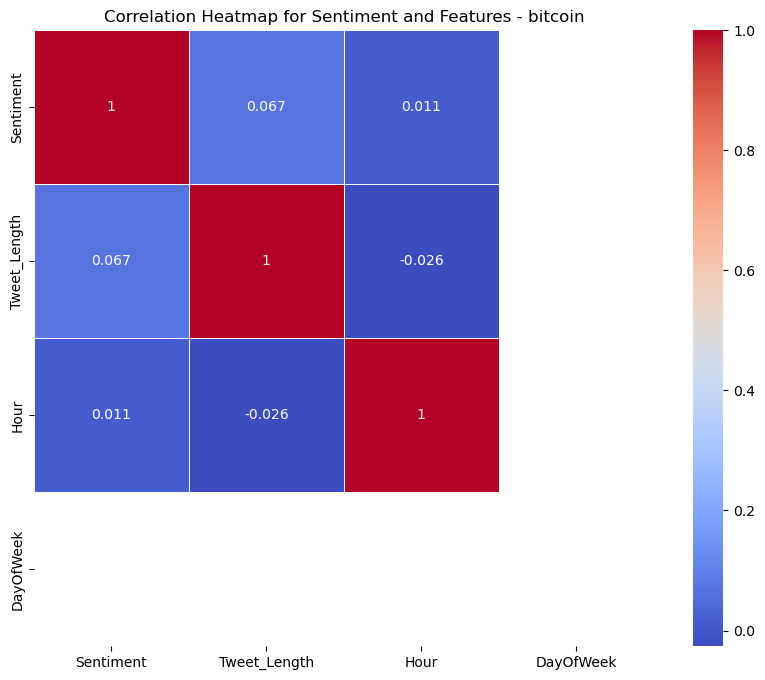

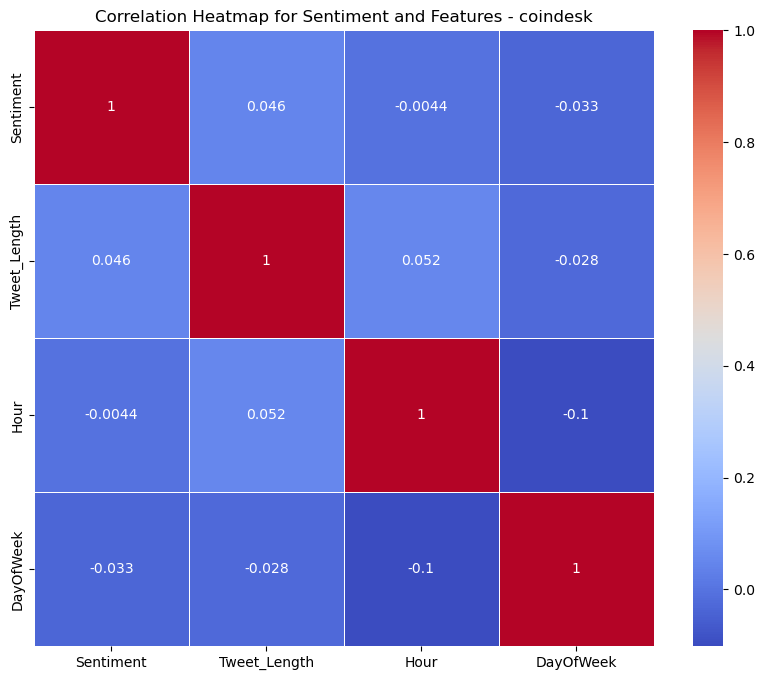

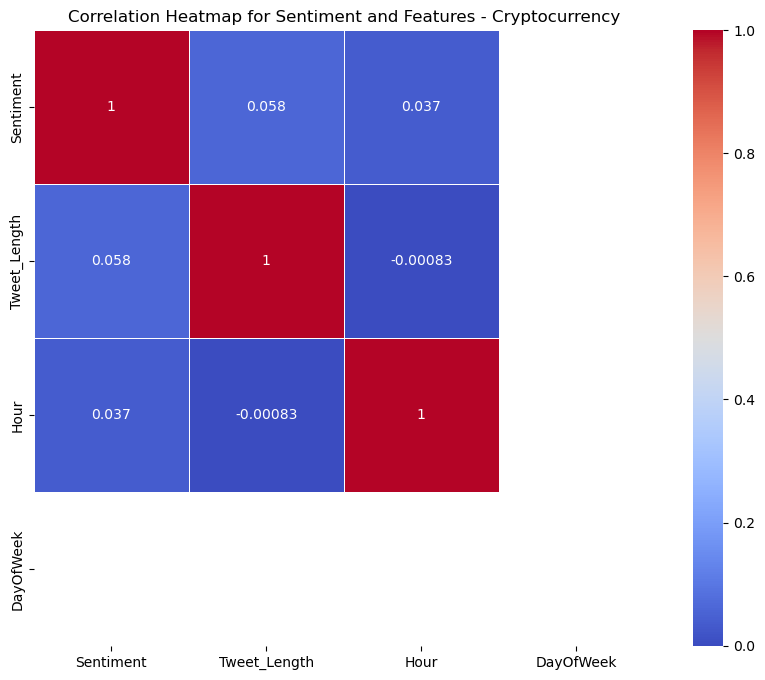

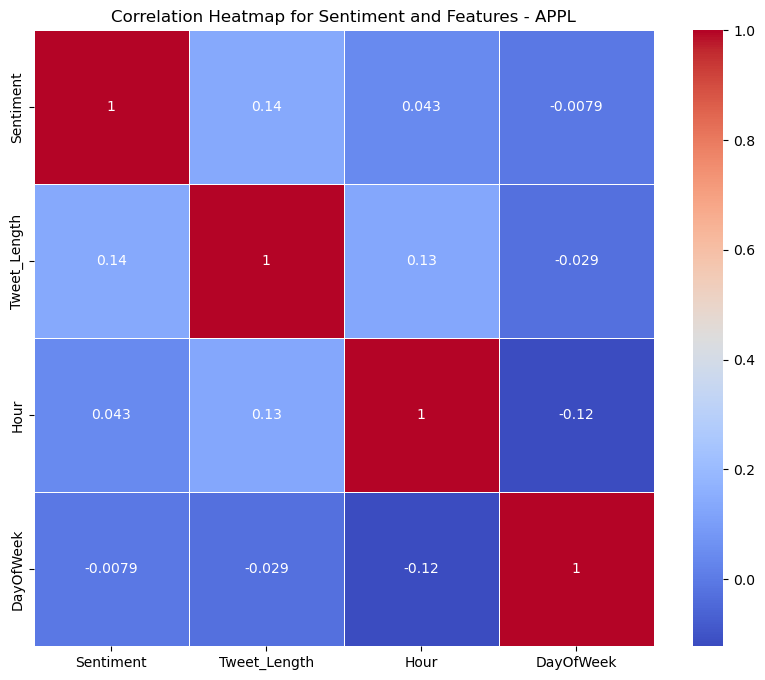

In [62]:
# 4. Correlation Heatmap for Sentiment and Features by Coin
for coin in coins:
    corr_sentiment_coin = df[df[coin] > 0][['Sentiment', 'Tweet_Length', 'Hour', 'DayOfWeek']].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_sentiment_coin, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title(f'Correlation Heatmap for Sentiment and Features - {coin}')
    plt.show()

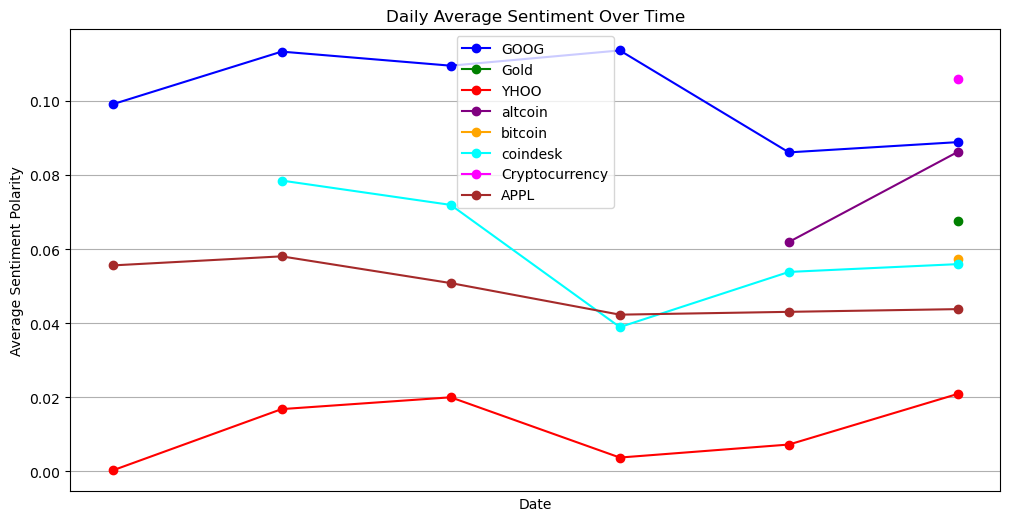

In [63]:
# Assuming df['Day'] is a datetime column
df['Day'] = pd.to_datetime(df['Day'])

# Define a set of colors for each coin
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'brown']

# Create a single plot
plt.figure(figsize=(12, 6))

# Iterate through coins and plot time series with different colors and linestyles
for i, coin in enumerate(coins):
    color = colors[i % len(colors)]  # Ensure the color index is within range
    coin_daily_sentiment = df[df[coin] > 0].groupby(df['Day'])['Sentiment'].mean()
    plt.plot(coin_daily_sentiment.index, coin_daily_sentiment.values, marker='o', linestyle='-', color=color, label=coin)

plt.title('Daily Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Polarity')
plt.legend()
plt.grid(True)
plt.show()


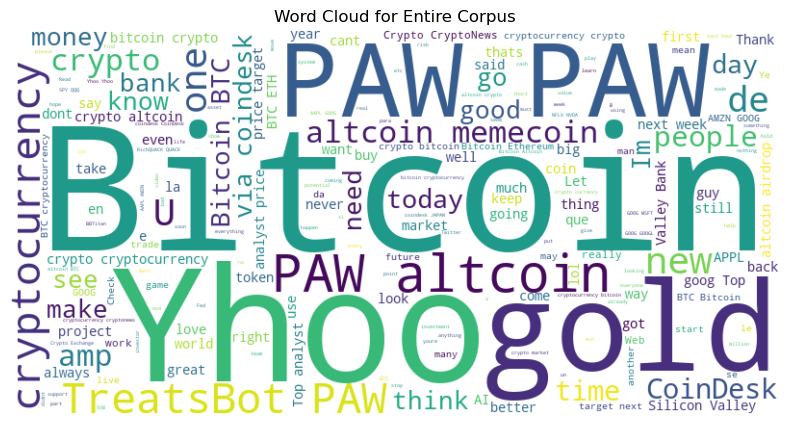

In [64]:
# Word Cloud for the entire corpus
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Entire Corpus')
plt.show()


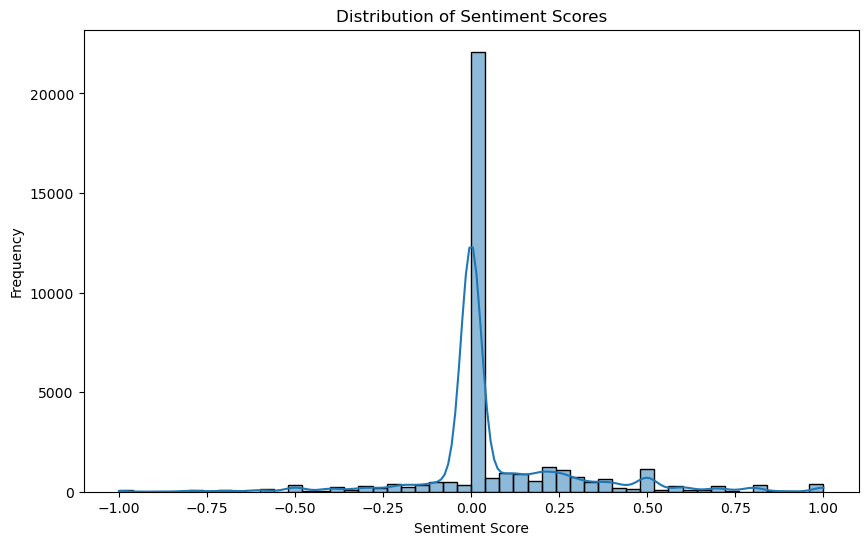

In [65]:
# Sentiment Analysis
df['Sentiment'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Distribution of Sentiment Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment'], bins=50, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [66]:
'''plt.figure(figsize=(15, 8))
sns.boxplot(x='Sentiment', y='Cryptocurrency', data=df, palette='viridis')
sns.swarmplot(x='Sentiment', y='Cryptocurrency', data=df, color='black', size=3)
plt.title('Boxplot with Swarm Plot of Sentiment Scores by Cryptocurrency Mentions')
plt.xlabel('Sentiment Score')
plt.ylabel('Cryptocurrency')
plt.show()'''


"plt.figure(figsize=(15, 8))\nsns.boxplot(x='Sentiment', y='Cryptocurrency', data=df, palette='viridis')\nsns.swarmplot(x='Sentiment', y='Cryptocurrency', data=df, color='black', size=3)\nplt.title('Boxplot with Swarm Plot of Sentiment Scores by Cryptocurrency Mentions')\nplt.xlabel('Sentiment Score')\nplt.ylabel('Cryptocurrency')\nplt.show()"

In [67]:
'''# Pairplot for Selected Columns
selected_columns = ['Sentiment', 'altcoin', 'bitcoin', 'Cryptocurrency', 'Gold']
sns.pairplot(df[selected_columns])
plt.suptitle('Pairplot of Selected Columns', y=1.02)
plt.show()'''

"# Pairplot for Selected Columns\nselected_columns = ['Sentiment', 'altcoin', 'bitcoin', 'Cryptocurrency', 'Gold']\nsns.pairplot(df[selected_columns])\nplt.suptitle('Pairplot of Selected Columns', y=1.02)\nplt.show()"

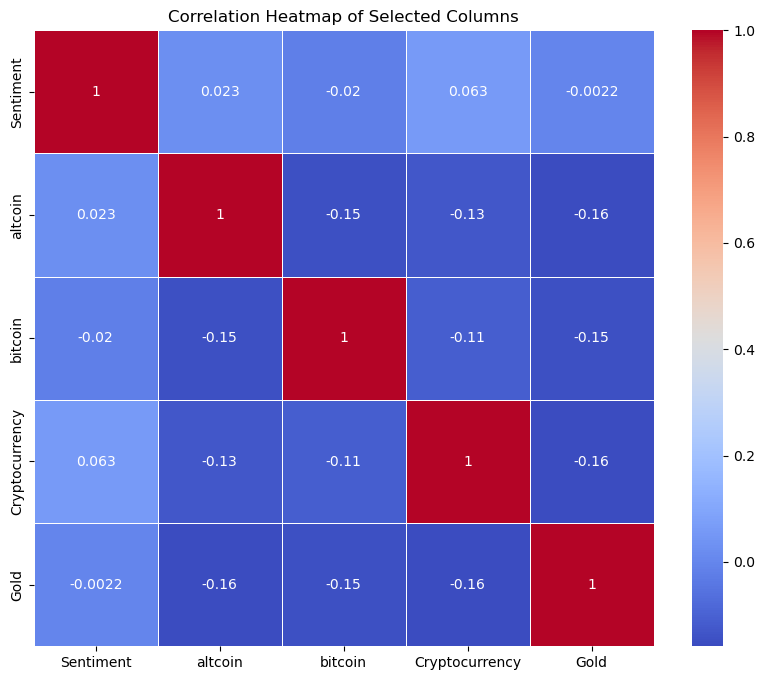

In [68]:
# Correlation Heatmap
selected_columns = ['Sentiment', 'altcoin', 'bitcoin', 'Cryptocurrency', 'Gold']
correlation_matrix = df[selected_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

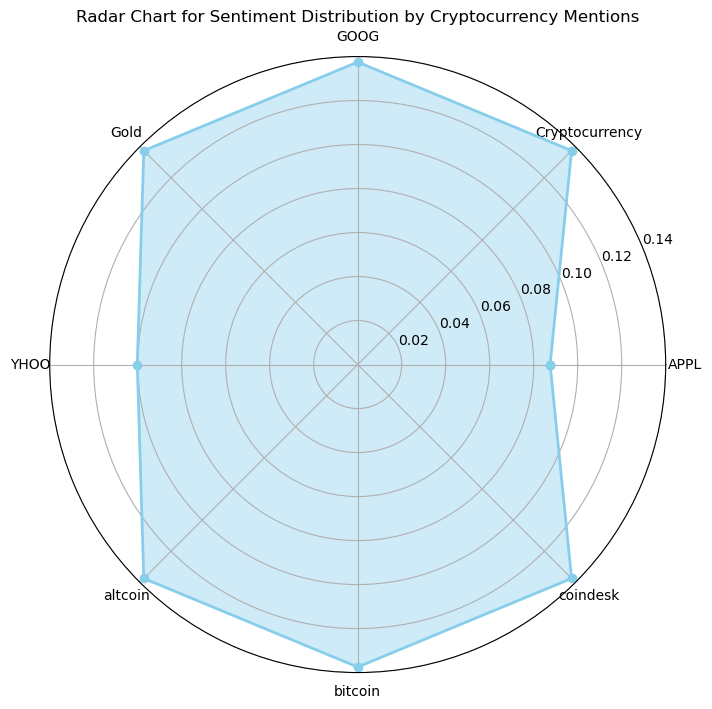

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'selected_columns' is defined elsewhere in your code
selected_columns = ['APPL', 'Cryptocurrency', 'GOOG', 'Gold', 'YHOO', 'altcoin', 'bitcoin', 'coindesk']  # Replace with your actual column names
categories = ['APPL', 'Cryptocurrency', 'GOOG', 'Gold', 'YHOO', 'altcoin', 'bitcoin', 'coindesk']  # Replace with your actual category names
values = df[selected_columns].mean().values

num_categories = len(categories)
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

# Close the plot by connecting the last point to the first point
values = np.concatenate((values, [values[0]]))
angles += [angles[0]]

plt.figure(figsize=(8, 8))
plt.polar(angles, values, marker='o', linestyle='solid', linewidth=2, color='skyblue')
plt.fill(angles, values, color='skyblue', alpha=0.4)
plt.title('Radar Chart for Sentiment Distribution by Cryptocurrency Mentions')
plt.xticks(angles[:-1], categories)
plt.show()
